<a href="https://colab.research.google.com/github/sancia15/PoeGen_LSTM/blob/master/PoemGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

Dataset Analysis

In [2]:
data=open('/poemgen1.txt').read()

Converting the text to lowercase and splitting it 


NLP

In [3]:
corpus = data.lower().split("\n")

Tokenization

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)


2032


In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Building the model

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))



Compiling the model

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           203200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 15, 400)           481600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 400)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 1016)              102616    
_________________________________________________________________
dense_3 (Dense)              (None, 2032)              2066544   
Total params: 3,054,360
Trainable params: 3,054,360
Non-trainable params: 0
____________________________________________

In [10]:
history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
234/234 [==============================] - 31s 132ms/step - loss: 6.8942 - accuracy: 0.0576
Epoch 2/200
234/234 [==============================] - 31s 131ms/step - loss: 6.2214 - accuracy: 0.0615
Epoch 3/200
234/234 [==============================] - 30s 130ms/step - loss: 6.0667 - accuracy: 0.0633
Epoch 4/200
234/234 [==============================] - 31s 131ms/step - loss: 5.9429 - accuracy: 0.0634
Epoch 5/200
234/234 [==============================] - 31s 131ms/step - loss: 5.8524 - accuracy: 0.0712
Epoch 6/200
234/234 [==============================] - 31s 131ms/step - loss: 5.7654 - accuracy: 0.0818
Epoch 7/200
234/234 [==============================] - 30s 130ms/step - loss: 5.6678 - accuracy: 0.0901
Epoch 8/200
234/234 [==============================] - 31s 132ms/step - loss: 5.5827 - accuracy: 0.0964
Epoch 9/200
234/234 [==============================] - 31s 132ms/step - loss: 5.5002 - accuracy: 0.1036
Epoch 10/200
234/234 [==============================] - 31s 131m

Plotting graph

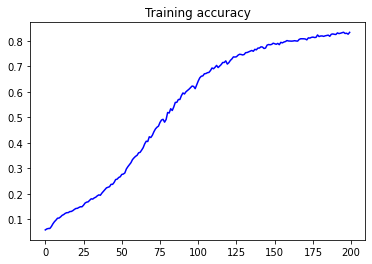

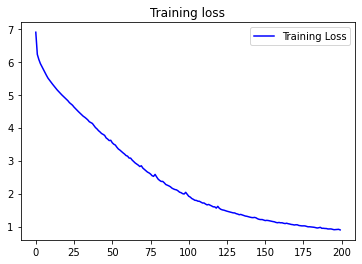

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Come all ye maidens young and fair"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Come all ye maidens young and fair and laid her city to me his renown rough this garden and ink so man volunteers remain long banks early nice day and want me never be wind they each half wheels her barrow embarrass a farm and put an accident night you does me no good song up in the friends and porter to welcome stranger hand on me and a moth in the town of much erin the west desolation id advance cry taken you bide meself be were runctions this friends the young way of me so fair lines wild fleet that wind they night youre landed


The accuracy has reached 80% with increased epochs